In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from sklearn.datasets import load_iris

iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target

palette = sns.color_palette("Set1", 3)

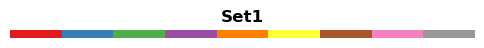

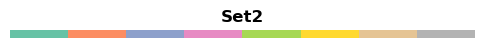

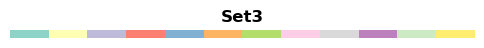

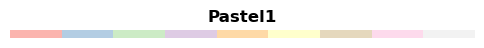

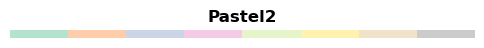

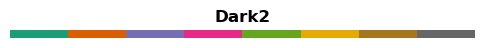

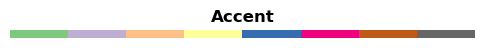

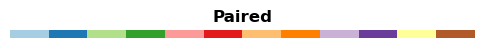

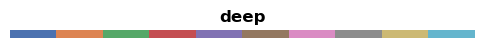

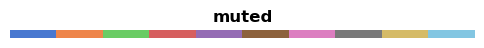

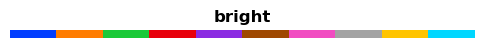

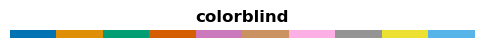

In [2]:
palette = ["Set1", "Set2", "Set3", "Pastel1", "Pastel2",
            "Dark2", "Accent", "Paired", "deep", "muted", "bright", "colorblind",]

for palette_name in palette:
    plt.figure(figsize=(6,0.1))
    plt.imshow([sns.color_palette(palette_name)], aspect='auto')
    plt.axis('off')
    plt.title(palette_name, fontsize=12, fontweight='bold')
    plt.show()

In [3]:
mean_values = iris.groupby('species').mean()
variance_values = iris.groupby('species').var()
skewness_values = iris.iloc[:, :-1].groupby(iris['species']).apply(lambda x: x.apply(skew))
kurtosis_values = iris.iloc[:, :-1].groupby(iris['species']).apply(lambda x: x.apply(kurtosis))

print("\nStatistical Summary for Each by Species: \n")
print("Mean Values: \n", mean_values)
print("\nVariance Values: \n", variance_values)
print("\nSkewness Values: \n", skewness_values)
print("\nKurtosis Values: \n", kurtosis_values)


Statistical Summary for Each by Species: 

Mean Values: 
          sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                           
0                    5.006             3.428              1.462   
1                    5.936             2.770              4.260   
2                    6.588             2.974              5.552   

         petal width (cm)  
species                    
0                   0.246  
1                   1.326  
2                   2.026  

Variance Values: 
          sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                           
0                 0.124249          0.143690           0.030159   
1                 0.266433          0.098469           0.220816   
2                 0.404343          0.104004           0.304588   

         petal width (cm)  
species                    
0                0.011106  
1                0.039106

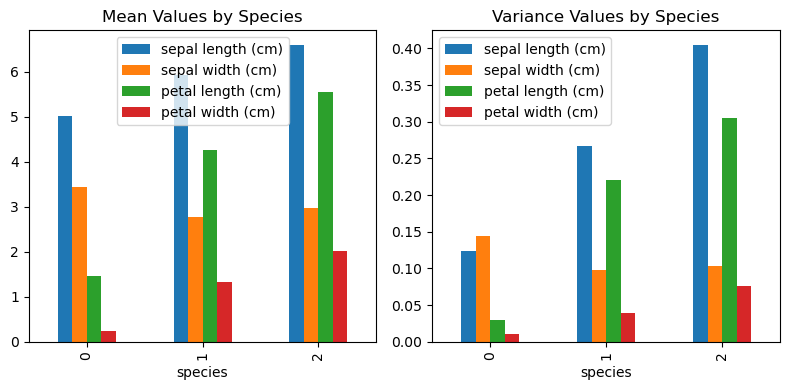

In [4]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
mean_values.plot(kind='bar', ax=plt.gca())
plt.title('Mean Values by Species')
plt.subplot(1, 2, 2)
variance_values.plot(kind='bar', ax=plt.gca())
plt.title('Variance Values by Species')
plt.tight_layout()
plt.show()

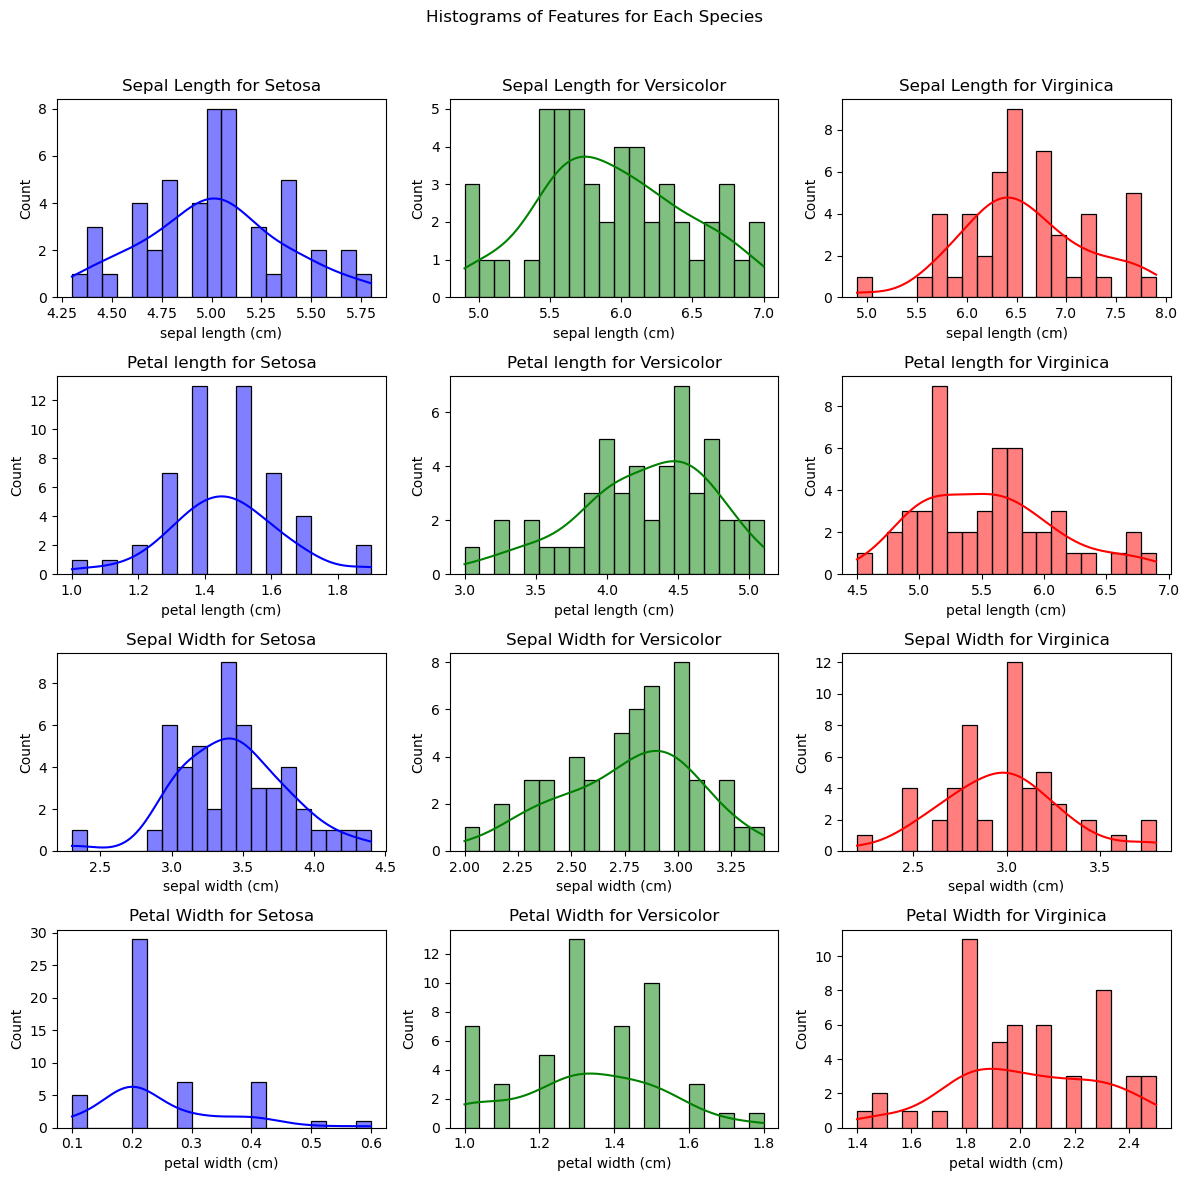

In [5]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
fig.suptitle("Histograms of Features for Each Species")

feature_color = ['b', 'g','r' ,'a']

sns.histplot(iris[iris['species'] == 0]['sepal length (cm)'], kde=True, bins=20, color=feature_color[0], ax=axes[0, 0])
axes[0,0].set_title('Sepal Length for Setosa')
sns.histplot(iris[iris['species'] == 1]['sepal length (cm)'], kde=True, bins=20, color=feature_color[1], ax=axes[0, 1])
axes[0,1].set_title('Sepal Length for Versicolor')
sns.histplot(iris[iris['species'] == 2]['sepal length (cm)'], kde=True, bins=20, color=feature_color[2], ax=axes[0, 2])
axes[0,2].set_title('Sepal Length for Virginica')

sns.histplot(iris[iris['species'] == 0]['petal length (cm)'], kde=True, bins=20, color=feature_color[0], ax=axes[1, 0])
axes[1,0].set_title('Petal length for Setosa')
sns.histplot(iris[iris['species'] == 1]['petal length (cm)'], kde=True, bins=20, color=feature_color[1], ax=axes[1, 1])
axes[1,1].set_title('Petal length for Versicolor')
sns.histplot(iris[iris['species'] == 2]['petal length (cm)'], kde=True, bins=20, color=feature_color[2], ax=axes[1, 2])
axes[1,2].set_title('Petal length for Virginica')

sns.histplot(iris[iris['species'] == 0]['sepal width (cm)'], kde=True, bins=20, color=feature_color[0], ax=axes[2, 0])
axes[2,0].set_title('Sepal Width for Setosa')
sns.histplot(iris[iris['species'] == 1]['sepal width (cm)'], kde=True, bins=20, color=feature_color[1], ax=axes[2, 1])
axes[2,1].set_title('Sepal Width for Versicolor')
sns.histplot(iris[iris['species'] == 2]['sepal width (cm)'], kde=True, bins=20, color=feature_color[2], ax=axes[2, 2])
axes[2,2].set_title('Sepal Width for Virginica')

sns.histplot(iris[iris['species'] == 0]['petal width (cm)'], kde=True, bins=20, color=feature_color[0], ax=axes[3, 0])
axes[3,0].set_title('Petal Width for Setosa')
sns.histplot(iris[iris['species'] == 1]['petal width (cm)'], kde=True, bins=20, color=feature_color[1], ax=axes[3, 1])
axes[3,1].set_title('Petal Width for Versicolor')
sns.histplot(iris[iris['species'] == 2]['petal width (cm)'], kde=True, bins=20, color=feature_color[2], ax=axes[3, 2])
axes[3,2].set_title('Petal Width for Virginica')

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.show()

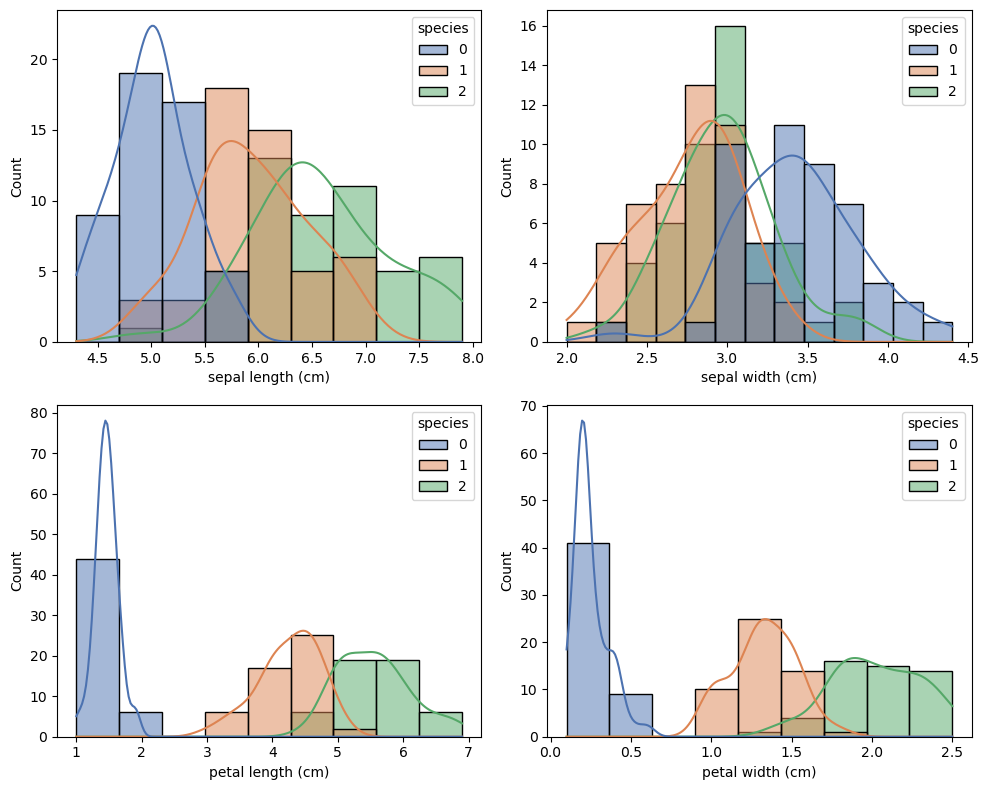

In [6]:
plt.figure(figsize=(10, 8))
for i , column in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=iris, x=column, hue='species', kde=True,palette='deep')
plt.tight_layout()
plt.show()

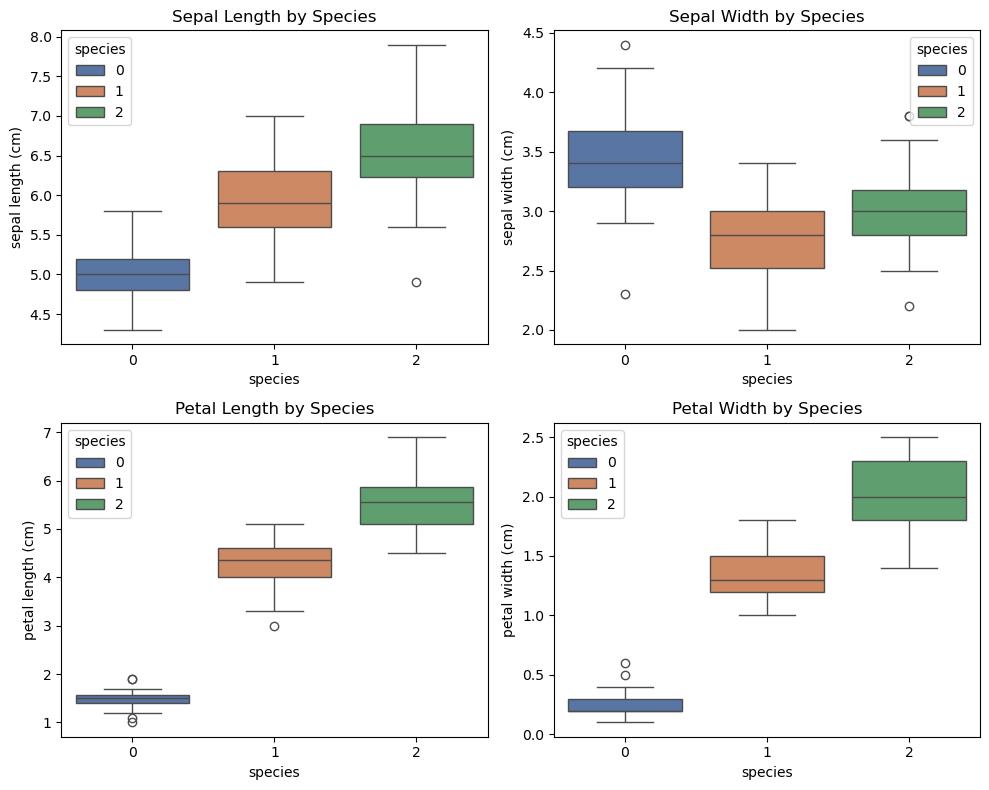

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

ax =axes[0,0]
sns.boxplot(data=iris, x='species', y='sepal length (cm)', hue='species',palette='deep', ax=ax)
ax.set_title('Sepal Length by Species')

ax =axes[0,1]
sns.boxplot(data=iris, x='species', y='sepal width (cm)', hue='species',palette='deep', ax=ax)
ax.set_title('Sepal Width by Species')

ax =axes[1,0]
sns.boxplot(data=iris, x='species', y='petal length (cm)', hue='species',palette='deep', ax=ax)
ax.set_title('Petal Length by Species')

ax =axes[1,1]
sns.boxplot(data=iris, x='species', y='petal width (cm)', hue='species',palette='deep', ax=ax)
ax.set_title('Petal Width by Species')

plt.tight_layout()
plt.show()

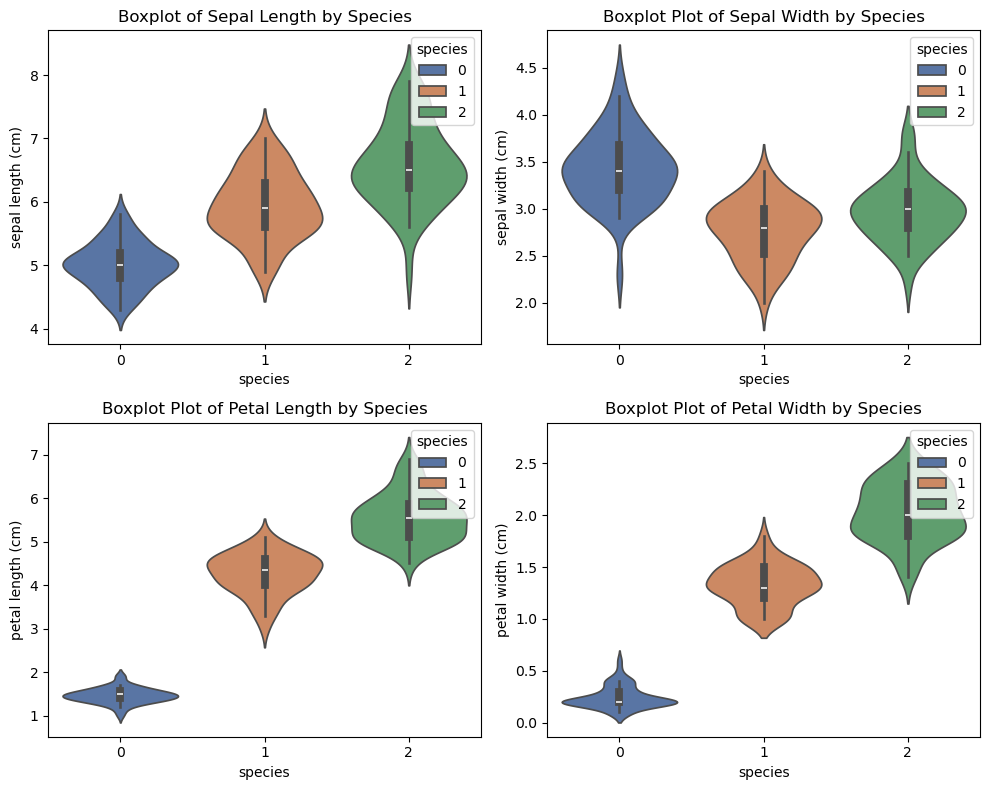

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes[0, 0]
sns.violinplot(data=iris, x='species', y='sepal length (cm)', hue='species', palette='deep', ax=ax)
ax.set_title('Boxplot of Sepal Length by Species')

ax = axes[0, 1]
sns.violinplot(data=iris, x='species', y='sepal width (cm)', hue='species', palette='deep', ax=ax)
ax.set_title('Boxplot Plot of Sepal Width by Species')

ax = axes[1, 0]
sns.violinplot(data=iris, x='species', y='petal length (cm)', hue='species', palette='deep', ax=ax)
ax.set_title('Boxplot Plot of Petal Length by Species')

ax = axes[1, 1]
sns.violinplot(data=iris, x='species', y='petal width (cm)', hue='species', palette='deep', ax=ax)
ax.set_title('Boxplot Plot of Petal Width by Species')

plt.tight_layout()
plt.show()

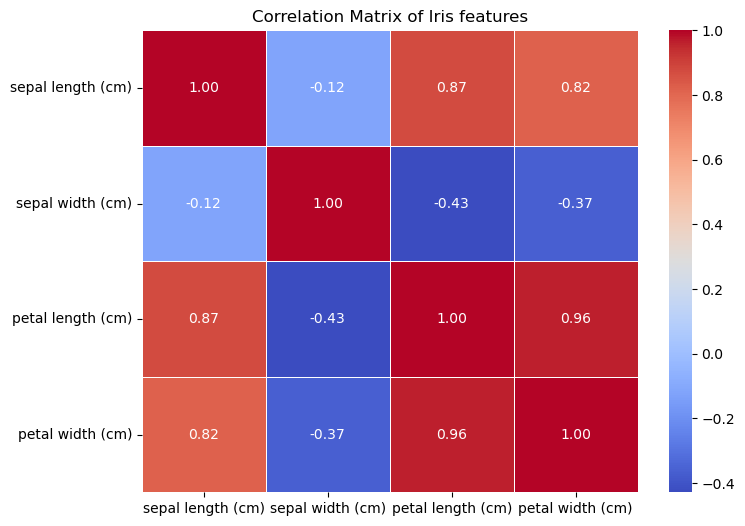

In [9]:
corr_matrix = iris.drop(columns=['species']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Iris features')
plt.show()

<Figure size 800x600 with 0 Axes>

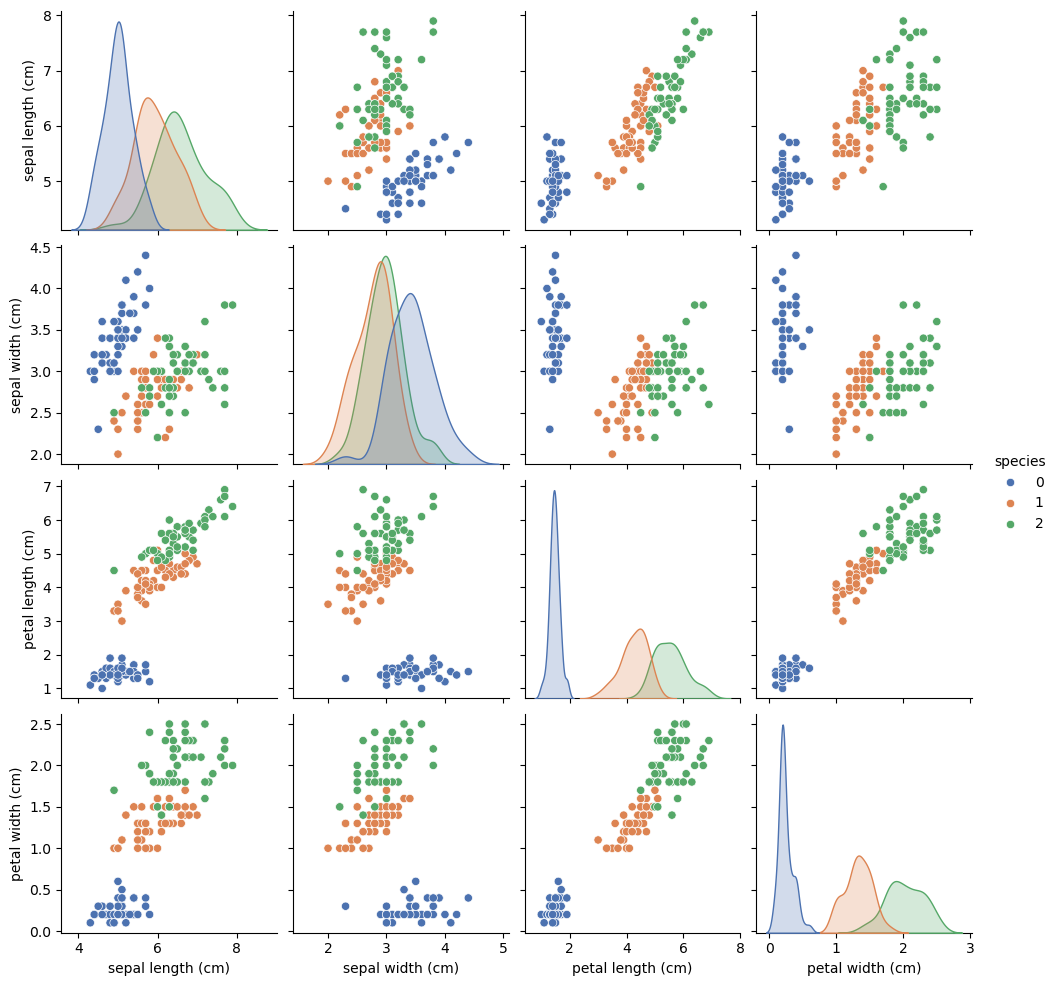

In [10]:
plt.figure(figsize=(8, 6))
sns.pairplot(iris, hue='species', palette='deep')
plt.show()

<Figure size 800x600 with 0 Axes>

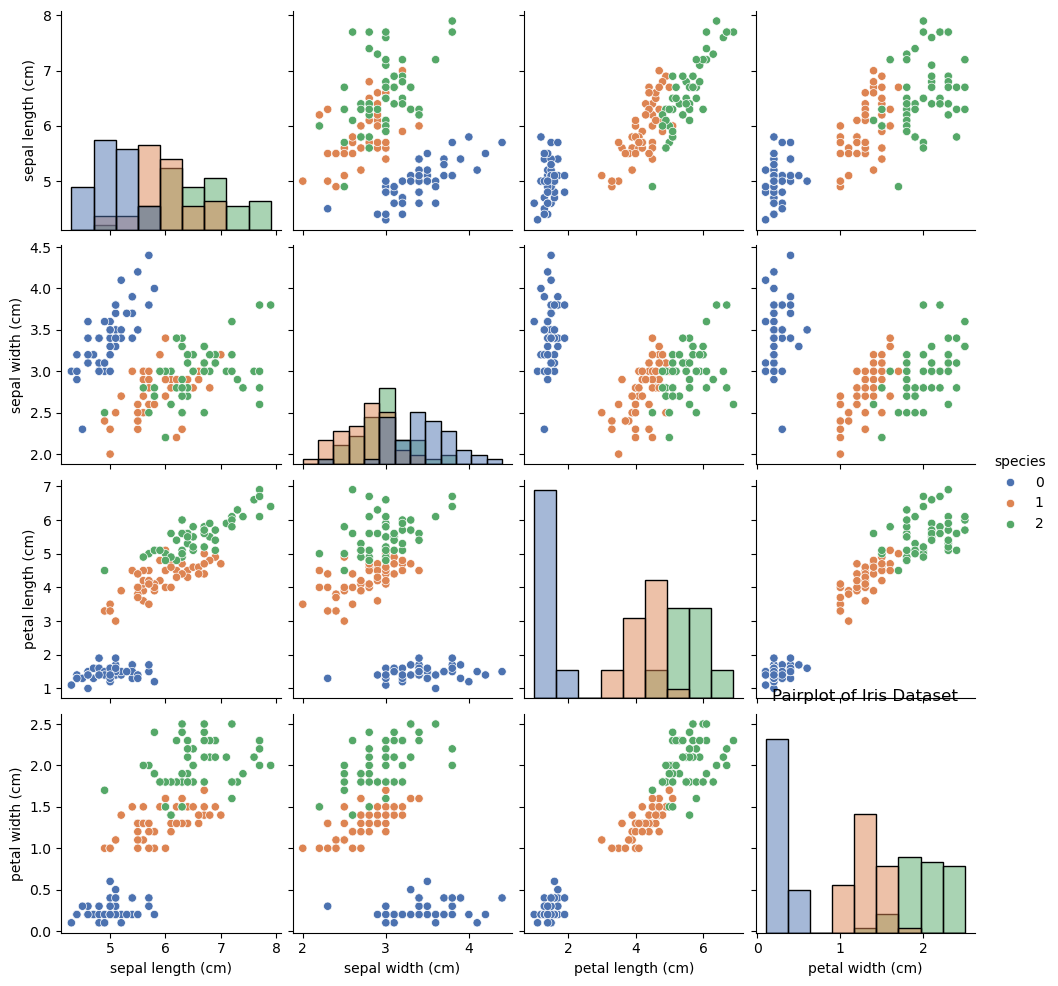

In [11]:
plt.figure(figsize=(8, 6))
sns.pairplot(iris, hue='species', palette='deep', diag_kind='hist')
plt.title('Pairplot of Iris Dataset',y=1.02)
plt.show()

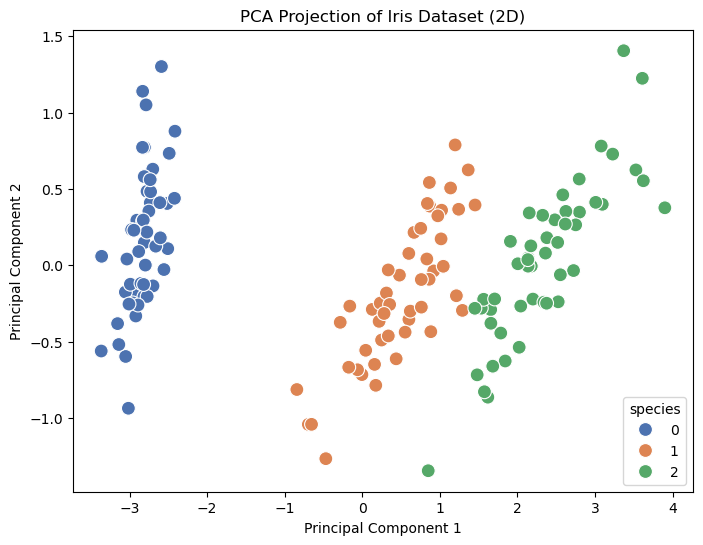

In [12]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris)
iris_pca_df = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
iris_pca_df['species'] = iris['species']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_pca_df, x='PC1', y='PC2', hue='species', palette='deep', s=100)
plt.title('PCA of Iris Dataset')
plt.title('PCA Projection of Iris Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()